In [1]:
import pandas as pd
import time, json
pd.options.mode.chained_assignment = None

# Dataset Import & Pre-processing

In [2]:
dfile = pd.read_csv("dataset/BMS Requirements.csv")
dfile

,Req ID,Req Name,Description,Pre-requisite,Cost,Value,Test Cases,Importance
0,101,URL,Unique web address to access the website,0,8,9,3,H
1,102,Choose Region Modal,To choose the city inorder to proceed,101,3,2,3,H
2,103,Home Page,Contains various...,102,7,8,5,H
3,104,Change Region,Enables to change the city,103,4,3,1,M
4,105,Search,To perform search,103,6,7,2,H
...,...,...,...,...,...,...,...,...
95,196,Brand Promotion,Corporate Brand Promotion,194,6,4,2,H
96,197,Bulk SMS Communication,Corporate feature enabling communication via S...,194,7,7,1,L
97,198,Corporate Gifting,Customizable Corporate Gifting schemes,194,4,8,3,M
98,199,Partner with BookMyShow,Partner with BookMyShow Corporate Suite,194,4,5,2,H


In [3]:
dfile = dfile.drop(["Description","Test Cases"], axis=1)

In [4]:
dfile['Pre-requisite'].unique()

array([  0, 101, 102, 103, 105, 107, 112, 114, 127, 133, 136, 137, 138,
       139, 142, 143, 146, 147, 164, 172, 174, 175, 179, 183, 188, 189,
       192, 194])

In [5]:
PRE_REQ_C = [0]*dfile['Req ID'].count()
dfile['PRE_REQ_COUNT'] = PRE_REQ_C

In [6]:
def subLen(this):
    if this in dfile['Pre-requisite'].values:
        return len(dfile.loc[dfile['Pre-requisite'] == this,'Req ID'])
    else:
        return 0

In [7]:
for re in dfile['Req ID']:
    if re in dfile['Pre-requisite'].values:
        print("ID:",re,"\t-->",end="")
        print( list(dfile.loc[dfile['Pre-requisite'] == re,'Req ID']) )
        dfile.loc[dfile['Req ID'] == re,'PRE_REQ_COUNT'] = dfile.loc[dfile['Pre-requisite'] == re,'Req ID'].count()
        
        for sub in list(dfile.loc[dfile['Pre-requisite'] == re,'Req ID']):
            dfile.loc[dfile['Req ID'] == re,'PRE_REQ_COUNT'] += subLen(sub)      

ID: 101 	-->[102]
ID: 102 	-->[103]
ID: 103 	-->[104, 105, 107, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 186, 187, 188, 194, 200]
ID: 105 	-->[106]
ID: 107 	-->[108, 109, 110, 111, 112]
ID: 112 	-->[114]
ID: 114 	-->[127, 163, 164, 178, 179]
ID: 127 	-->[128, 129, 130, 131, 132, 133, 134, 135]
ID: 133 	-->[136]
ID: 136 	-->[137]
ID: 137 	-->[138]
ID: 138 	-->[139]
ID: 139 	-->[140, 141, 142]
ID: 142 	-->[143]
ID: 143 	-->[144, 145, 146, 147]
ID: 146 	-->[148, 149, 150, 151, 152, 153, 154, 155, 156, 157]
ID: 147 	-->[158, 159, 160, 161, 162, 177, 185]
ID: 164 	-->[165, 166, 167, 168, 169, 170, 171, 172, 173]
ID: 172 	-->[174]
ID: 174 	-->[175]
ID: 175 	-->[176]
ID: 179 	-->[180, 181, 182, 183]
ID: 183 	-->[184]
ID: 188 	-->[189, 191, 192]
ID: 189 	-->[190]
ID: 192 	-->[193]
ID: 194 	-->[195, 196, 197, 198, 199]


In [8]:
n = pd.get_dummies( dfile["Importance"] )
dfile=pd.concat([dfile,n],axis=1)
dfile = dfile.drop(['Importance'], axis=1)

In [9]:
Weightage = [0]*dfile['Req ID'].count()
dfile['Weightage'] = Weightage

In [10]:
dfile['Weightage']=( dfile['PRE_REQ_COUNT']+
    (10-(dfile['Cost'] / dfile['Value']))+
    (10*dfile['H']) + (5*dfile['M']) + (1*dfile['L'])
)

In [11]:
dfile['Weightage'].max()

54.125

In [12]:
print( dfile['PRE_REQ_COUNT'].min(), dfile['Cost'].min(), dfile['Value'].min() )
print( dfile['PRE_REQ_COUNT'].max(), dfile['Cost'].max(), dfile['Value'].max() )

0 1 1
35 8 9


In [13]:
dfile

,Req ID,Req Name,Pre-requisite,Cost,Value,PRE_REQ_COUNT,H,L,M,Weightage
0,101,URL,0,8,9,2,1,0,0,21.111111
1,102,Choose Region Modal,101,3,2,22,1,0,0,40.500000
2,103,Home Page,102,7,8,35,1,0,0,54.125000
3,104,Change Region,103,4,3,0,0,0,1,13.666667
4,105,Search,103,6,7,1,1,0,0,20.142857
...,...,...,...,...,...,...,...,...,...,...
95,196,Brand Promotion,194,6,4,0,1,0,0,18.500000
96,197,Bulk SMS Communication,194,7,7,0,0,1,0,10.000000
97,198,Corporate Gifting,194,4,8,0,0,0,1,14.500000
98,199,Partner with BookMyShow,194,4,5,0,1,0,0,19.200000


# Function for algorithm input

In [14]:
def obj_function(genome):
    x1, x2, x3, x4, x5, x6 = genome
    
    if x5==x6:
        x6=0
    if x4==x5 or x4==x6:
        x5 = x6 = 0
    if x4>x5 and x4>x6:
        x5 = x6 = 0
    if x5>x6 and x5>x4:
        x4 = x6 = 0
    if x6>x4 and x6>x5:
        x4 = x5 = 0
        
    if x3==0:
        return 0
    else:
        return x1 + (10-(x2/x3)) + (x4*9) + (x5*5) + (x6*1)

In [15]:
maximumIterations = 30

# Genetic Algorithm

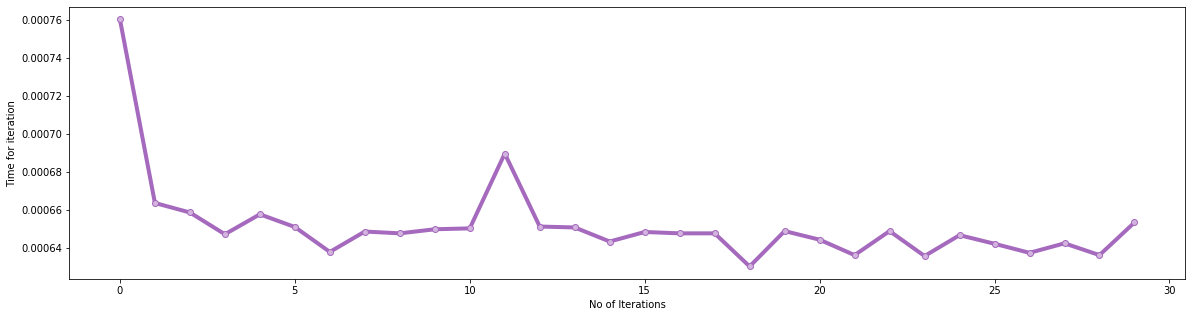

Best values for x:  [35  2  7  1  1  1]
Best value for f(x): 53.714285714285715


In [16]:
ga_start = time.time()

from GA import GeneticAlgorithm

ga = GeneticAlgorithm(
    obj_function, 
    pop_size=100, 
    genome_length=6,
    lb=[dfile['PRE_REQ_COUNT'].min(), dfile['Cost'].min(), dfile['Value'].min(), 0, 0, 0 ],
    ub=[dfile['PRE_REQ_COUNT'].max(), dfile['Cost'].max(), dfile['Value'].max(), 1, 1, 1]
)
ga.generate_binary_population()
ga.number_of_pairs = 4

ga.selective_pressure = 1.3
ga.mutation_rate = 0.1

ga.run(maximumIterations)

ga_total = time.time() - ga_start

best_genome, best_fitness = ga.get_best_genome()
print("Best values for x: ", best_genome)
print("Best value for f(x):", best_fitness)

In [17]:
print("GA took ",ga_total," seconds")

GA took  0.4609839916229248  seconds


## Output based on GA

In [18]:
gafile = dfile.copy()

In [19]:
gafile['Difference'] = abs( gafile['Weightage']-best_fitness )
gafile.sort_values('Difference', ascending=True, axis=0, inplace = True)

In [20]:
gafile = gafile.drop(['H', 'L', 'M'], axis=1)
gafile = gafile.reset_index(drop=True)

In [21]:
gafile

,Req ID,Req Name,Pre-requisite,Cost,Value,PRE_REQ_COUNT,Weightage,Difference
0,103,Home Page,102,7,8,35,54.125000,0.410714
1,143,Proceed for Payment,142,1,7,21,40.857143,12.857143
2,102,Choose Region Modal,101,3,2,22,40.500000,13.214286
3,114,Category List,112,5,7,26,40.285714,13.428571
4,164,Check Event,114,3,6,10,29.500000,24.214286
...,...,...,...,...,...,...,...,...
95,132,Share Movie,127,8,5,0,9.400000,44.314286
96,110,Continue with Google,107,7,3,0,8.666667,45.047619
97,170,Event Terms,164,3,1,0,8.000000,45.714286
98,115,Customer Care,103,7,2,0,7.500000,46.214286


In [22]:
gafile.to_csv('output/GA ouput.csv', index=False, encoding='utf-8')

# Particle Swarm Optimization

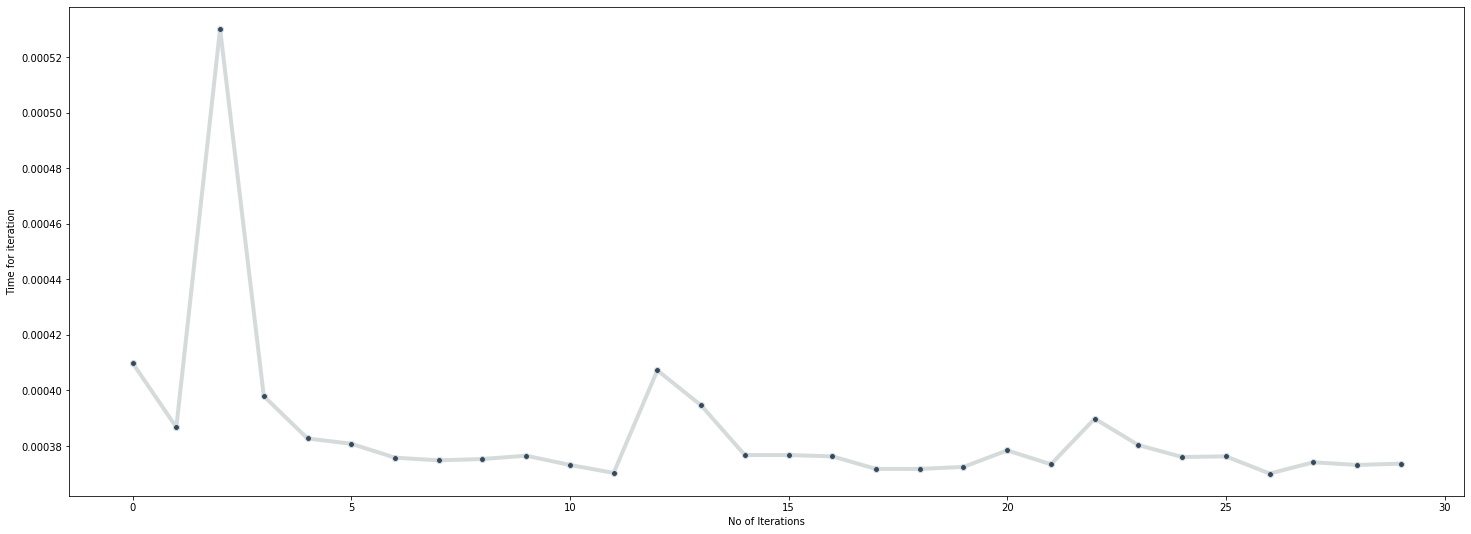

Best values of x:  [35.   3.4  8.6  1.   1.   1. ]
Best values of f(x):  53.604651162790695


In [23]:
pso_start = time.time()

from PSO import PSO

instance = PSO(
    func=obj_function,
    dim=6,
    pop=100,
    lb=[dfile['PRE_REQ_COUNT'].min(), dfile['Cost'].min(), dfile['Value'].min(), 0, 0, 0 ],
    ub=[dfile['PRE_REQ_COUNT'].max(), dfile['Cost'].max(), dfile['Value'].max(), 1, 1, 1],
    w=0.7, c1=0.6, c2=0.6
)

pso_result = instance.run(max_iter=maximumIterations)

pso_total = time.time()-pso_start

print("Best values of x: ", pso_result.gbest_x)
print("Best values of f(x): ", pso_result.gbest_y)

In [24]:
print("PSO took ",pso_total," seconds")

PSO took  0.3967924118041992  seconds


## Output based on PSO

In [25]:
psofile = dfile.copy()

In [26]:
psofile['Difference'] = abs( psofile['Weightage']-pso_result.gbest_y )
psofile.sort_values('Difference', ascending=True, axis=0, inplace = True)

In [27]:
psofile = psofile.drop(['H', 'L', 'M'], axis=1)
psofile = psofile.reset_index(drop=True)

In [28]:
psofile

,Req ID,Req Name,Pre-requisite,Cost,Value,PRE_REQ_COUNT,Weightage,Difference
0,103,Home Page,102,7,8,35,54.125000,0.520349
1,143,Proceed for Payment,142,1,7,21,40.857143,12.747508
2,102,Choose Region Modal,101,3,2,22,40.500000,13.104651
3,114,Category List,112,5,7,26,40.285714,13.318937
4,164,Check Event,114,3,6,10,29.500000,24.104651
...,...,...,...,...,...,...,...,...
95,132,Share Movie,127,8,5,0,9.400000,44.204651
96,110,Continue with Google,107,7,3,0,8.666667,44.937984
97,170,Event Terms,164,3,1,0,8.000000,45.604651
98,115,Customer Care,103,7,2,0,7.500000,46.104651


In [29]:
psofile.to_csv('output/PSO ouput.csv', index=False, encoding='utf-8')

# Comparitive Analysis

In [30]:
equality = True
for i in range( gafile['Req ID'].count() ):
    if gafile['Req ID'][i] != psofile['Req ID'][i]:
        print(gafile['Req ID'][i], psofile['Req ID'][i]," are different!")
        equality = False

if equality:
    print("The ouputs from both algorithms are equal")

The ouputs from both algorithms are equal


In [31]:
customerRank = pd.read_csv("dataset/Req Customer Ranking.csv")

In [32]:
gaAccurate = 0; gaError = 0;

gaAccurate = gafile.loc[ gafile['Req ID']==customerRank['Req ID'], 'Req ID' ].count()
gaAccurate = (gaAccurate/gafile['Req ID'].count())*100

gaError = 100 - gaAccurate

print("Accuracy of GA: ", gaAccurate, "%" )
print("Error of GA: ", gaError, "%" )

Accuracy of GA:  82.0 %
Error of GA:  18.0 %


In [33]:
psoAccurate= 0; psoError = 0;

psoAccurate= psofile.loc[ psofile['Req ID']==customerRank['Req ID'], 'Req ID' ].count()
psoAccurate= (psoAccurate/psofile['Req ID'].count())*100

psoError = 100 - psoAccurate

print("Accuracy of PSO: ", psoAccurate, "%" )
print("Error of PSO: ", psoError, "%" )

Accuracy of PSO:  82.0 %
Error of PSO:  18.0 %


In [34]:
print(ga_total, " is GA total time")
print(pso_total, " is PSO total time")

0.4609839916229248  is GA total time
0.3967924118041992  is PSO total time


# Export Output

In [35]:
dict_op = {
    "PSO":{
        "x" : pso_result.gbest_x.tolist(),
        "fx" : int(pso_result.gbest_y),
        "xaxis" : list(pso_result.xaxis),
        "yaxis" : list(pso_result.yaxis),
        "time" : float(pso_total),
        "accuracy" : psoAccurate
    },
    "GA":{
        "x" : best_genome.tolist(),
        "fx" : int(best_fitness),
        "xaxis" : list(ga.xaxis),
        "yaxis" : list(ga.yaxis),
        "time" : float(ga_total),
        "accuracy" : gaAccurate
    },
    "Equality": equality,
    "maximumIterations": maximumIterations
    }
json_op = json.dumps( dict_op )

File = open('output/output.json', 'w')
File.write( json_op )

1886

In [36]:
File.close()

# Export to python3 file

In [37]:
# Convert to python3 script file

# !jupyter nbconvert --to script "BMS Requirements"